In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from PIL import Image
import os
import pandas as pd
import pylab as pl

In [4]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

In [5]:
img_dir = os.path.join(os.getcwd(), "images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [57]:
X = pd.DataFrame([im.histogram() for im in images])

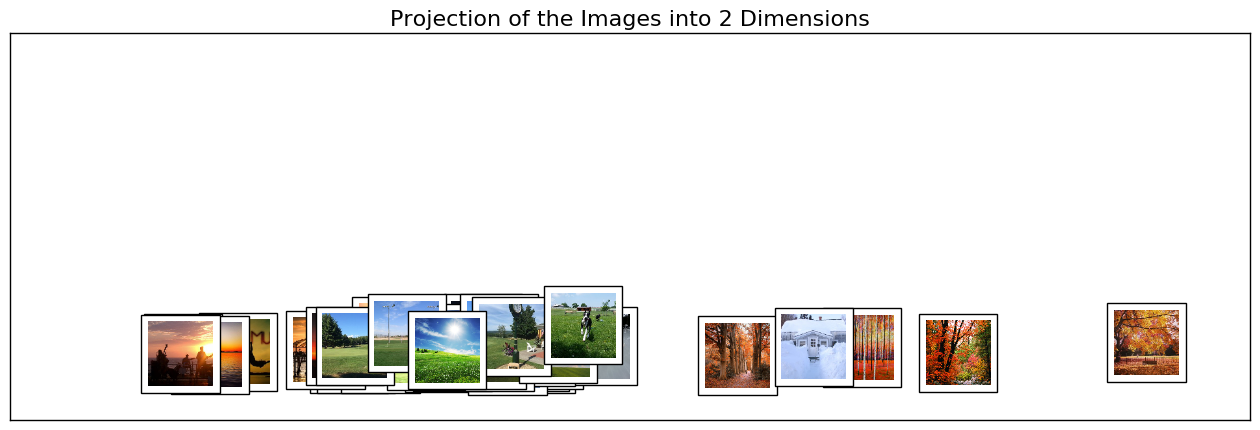

In [58]:
plot_image_space(images, X, title="Projection of the Images into 2 Dimensions")

## Part 1

In [48]:
from time import time

import numpy as np
import pandas as pd
import pylab as pl
from sklearn import (cluster, datasets, decomposition, ensemble, manifold, random_projection)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mpl_toolkits.mplot3d import Axes3D # needed to modify the way figure behaves

In [49]:
# Projection onto the first 8 principal components

# global centering
X_centered = X - X.mean()
    
#print("Computing PCA projection..."),
pca = decomposition.PCA(n_components=8)
X_pca = pca.fit_transform(X_centered)
#print("done.")

print(pca.explained_variance_ratio_)

[ 0.24632315  0.10808704  0.09190418  0.08758927  0.06501982  0.0567529
  0.05040241  0.0402909 ]


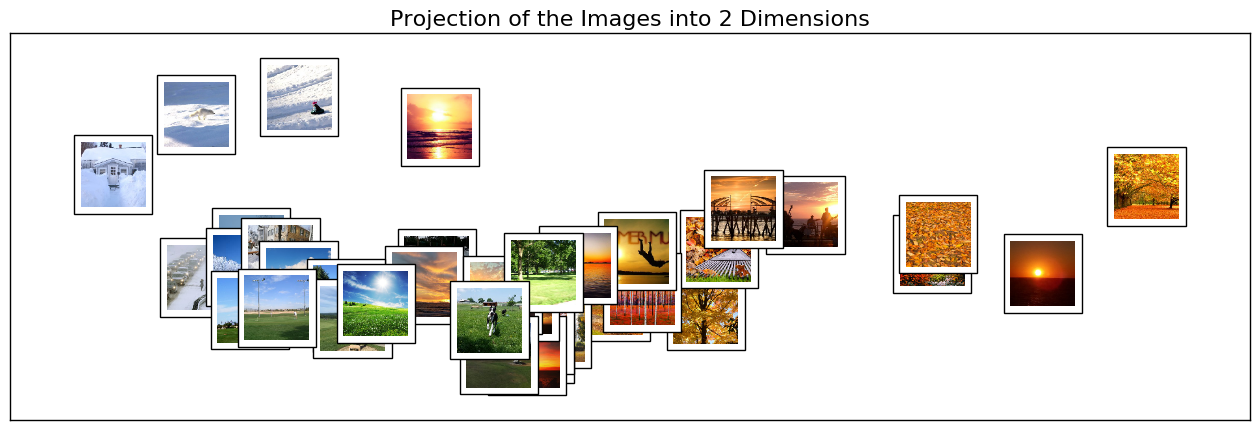

In [54]:
# Compute (two-dimensional) PCA on the digits dataset

#print("Computing PCA projection..."),
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X_centered)
#print("done.")

# Plot PCA result
plot_image_space(images, X_pca, title="Projection of the Images into 2 Dimensions")

## Part 2
1. If two images are close together, it means that these two images have similar features, especially with similar color which reflect the similar season in this plot. On the other hand, if images are far apart, it means that these images have different features.

2. Yes it does. We do PCA to this plot by reducing the histogram of color values. The color of image is the principal feature we are going to implement. So the images with similar color component tend to group together more closely. Meanwhlie, the color has strong relationship with season such as white reflect winter or green reflect spring.

## Part 3
#### Repeat this process while using a different set of images.

In [99]:
img_dir2 = os.path.join(os.getcwd(), "images2") # directory path
images2 = load_images(img_dir2) # load images in the specified directory

In [100]:
X2 = pd.DataFrame([im.histogram() for im in images2])

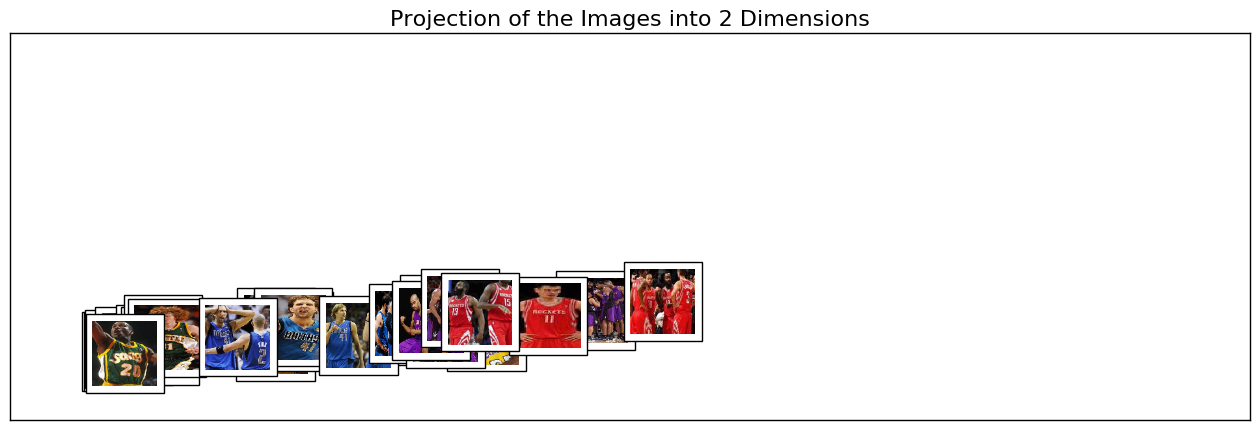

In [101]:
plot_image_space(images2, X2, title="Projection of the Images into 2 Dimensions")

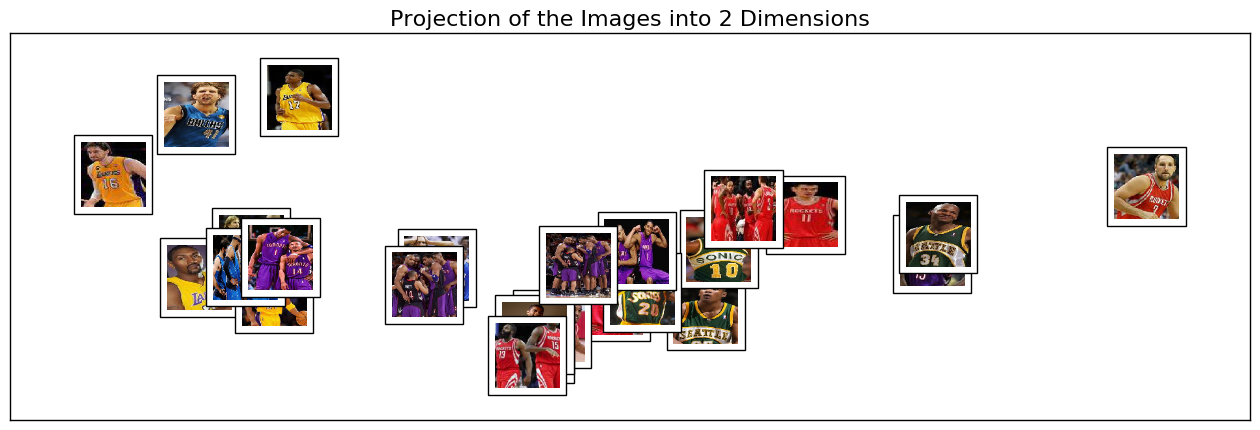

In [102]:
# Compute (two-dimensional) PCA on the digits dataset

#print("Computing PCA projection..."),
pca2 = decomposition.PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_centered)
#print("done.")

# Plot PCA result
plot_image_space(images2, X_pca2, title="Projection of the Images into 2 Dimensions")

If two images are close together, it means that these two images have similar features. These images are of the basketball players. Since their team uniforms are in different color, we could group these images by team.